In [ ]:
Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset


Dataset :- https://www.kaggle.com/c/dogs-vs-cats/data

In [19]:
import zipfile
import os
from PIL import Image
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
zip_file_path = '/content/DogsvsCats.zip'
extract_dir = '/content/DogsvsCats'

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [7]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [20]:
def preprocess_image(file_path, transform):
    img = Image.open(file_path).convert('RGB')
    img = transform(img)
    img_np = np.array(img)
    img_flat = img_np.flatten()
    return img_flat, img

In [21]:
dataset_dir = os.path.join(extract_dir, 'DogsvsCats')

In [22]:
X = []
y = []
images = []

In [23]:
for label, dir_name in enumerate(['dogs', 'cats']):
    dir_path = os.path.join(dataset_dir, dir_name)
    for file_name in tqdm(os.listdir(dir_path), desc=f'Processing {dir_name}'):
        if file_name.startswith('.'):
            continue
        file_path = os.path.join(dir_path, file_name)
        try:
            features, img = preprocess_image(file_path, transform)
            X.append(features)
            y.append(label)
            images.append(img)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

Processing cats: 100%|██████████| 11/11 [00:00<00:00, 180.97it/s]


In [24]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

SVC(kernel='linear')

In [16]:
y_pred = svm_classifier.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

In [25]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



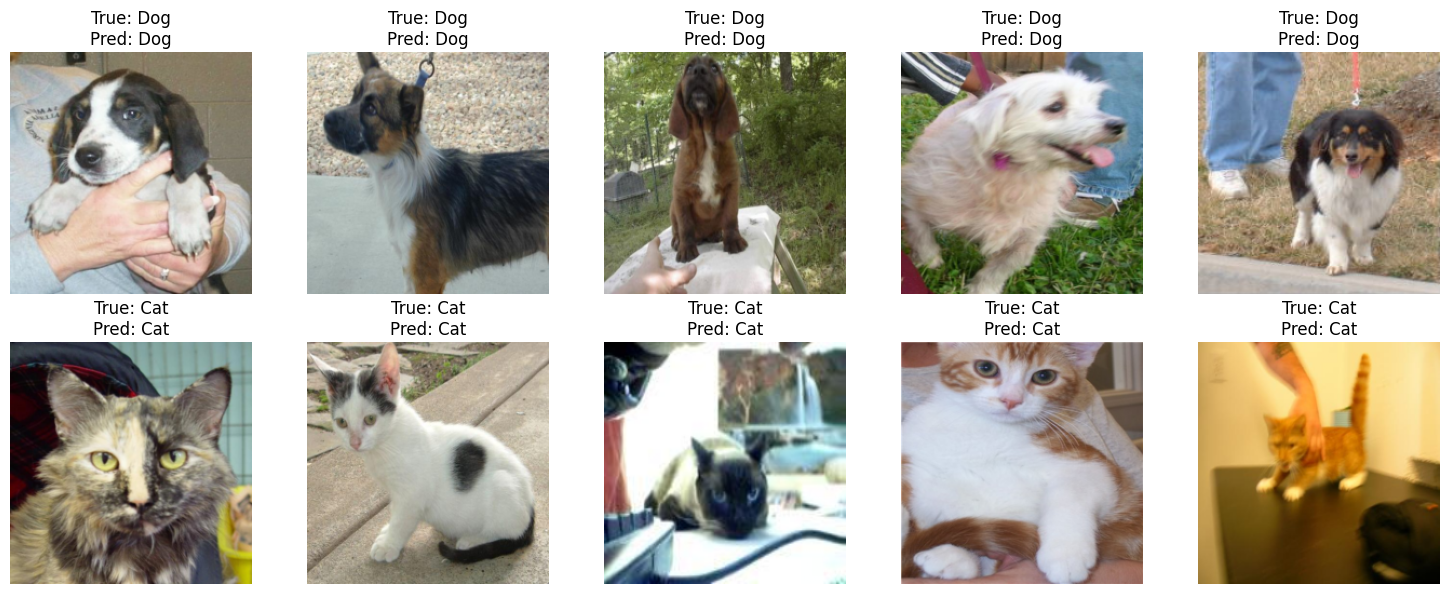

In [40]:
num_samples = 5
fig, axs = plt.subplots(2, num_samples, figsize=(15, 6))
displayed_cats = 0
displayed_dogs = 0
for i in range(len(images)):
    if displayed_cats >= num_samples and displayed_dogs >= num_samples:
        break
    ax_row = axs[y[i]]
    if y[i] == 0 and displayed_cats < num_samples:
        ax = ax_row[displayed_cats]
        true_label = 'Dog'
        displayed_cats += 1
    elif y[i] == 1 and displayed_dogs < num_samples:
        ax = ax_row[displayed_dogs]
        true_label = 'Cat'
        displayed_dogs += 1
    else:
        continue
    ax.imshow(images[i].permute(1, 2, 0))
    ax.axis('off')
    pred_label = 'Dog' if y_pred[i] == 0 else 'Cat'
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')

plt.tight_layout()
plt.show()